In [1]:
# import libraries, classes and functions
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Data/airline_passengers.csv',index_col='Month', parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [6]:
df.iloc[-1]

Thousands of Passengers    432
Name: 1960-12-01 00:00:00, dtype: int64

In [7]:
df.iloc[1]

Thousands of Passengers    118
Name: 1949-02-01 00:00:00, dtype: int64

In [8]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'].astype('<f8'),
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [11]:
test_predictions = fitted_model.forecast(36)

In [12]:
test_predictions.head()

1958-02-01    339.142634
1958-03-01    399.274989
1958-04-01    394.218973
1958-05-01    402.533277
1958-06-01    473.136451
Freq: MS, dtype: float64

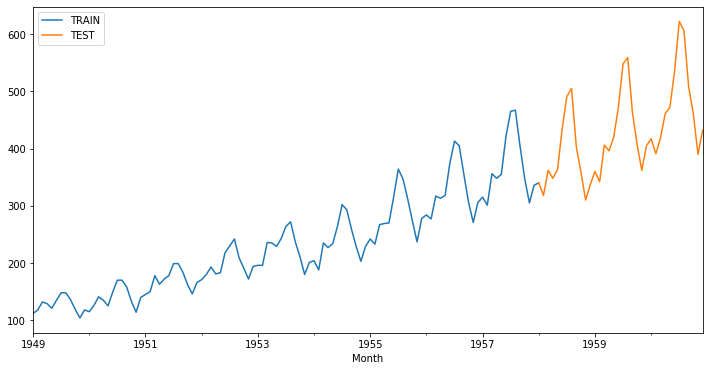

In [13]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

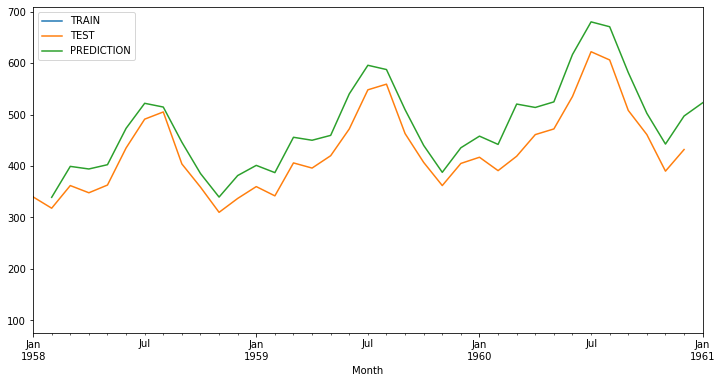

In [14]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01','1961-01-01'])

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [18]:
mean_squared_error(test_data, test_predictions)

74.92493943746796

In [19]:
mean_absolute_error(test_data, test_predictions)

63.02675182545758

In [20]:
mean_squared_error(test_data, test_predictions)**0.5

74.92493943746796

#### Forecasting in the future (unknown date point)

In [23]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'].astype('<f8'),
                                   trend='mul', 
                                   seasonal='mul', 
                                   seasonal_periods=12).fit()

In [24]:
forecast_predictions = final_model.forecast(36)

In [25]:
type(forecast_predictions)

pandas.core.series.Series

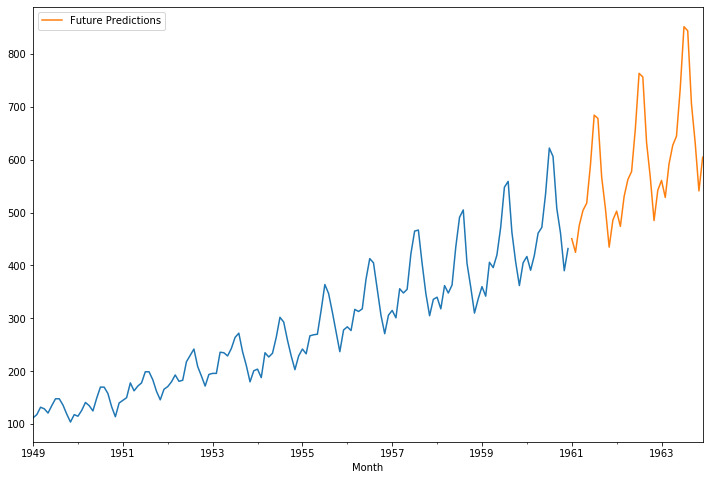

In [28]:
df['Thousands of Passengers'].plot()
forecast_predictions.plot(legend=True, label='Future Predictions', figsize=(12,8))